## Access Vessel Satellite Radiance Derived Product data in Zarr
A jupyter notebook to show how to access and plot the AODN vessel_satellite_radiance_derived_product dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/28f8bfed-ca6a-472a-84e4-42563ce4df3f).

In [1]:
dataset_name = "vessel_satellite_radiance_derived_product"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 37ms


✅ Local version 0.2.1 is up to date (remote: 0.2.1)


In [3]:
from DataQuery import GetAodn

# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 507 ms, sys: 114 ms, total: 621 ms
Wall time: 1.96 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	TIME = 448620 ;
	WAVELENGTH = 596 ;

variables:
	float64 LATITUDE(TIME) ;
		LATITUDE:axis = Y ;
		LATITUDE:long_name = latitude ;
		LATITUDE:reference_datum = geographical coordinates, WGS84 projection ;
		LATITUDE:standard_name = latitude ;
		LATITUDE:units = degrees_north ;
		LATITUDE:valid_max = 90.0 ;
		LATITUDE:valid_min = -90.0 ;
	float64 LONGITUDE(TIME) ;
		LONGITUDE:axis = X ;
		LONGITUDE:long_name = longitude ;
		LONGITUDE:reference_datum = geographical coordinates, WGS84 projection ;
		LONGITUDE:standard_name = longitude ;
		LONGITUDE:units = degrees_east ;
		LONGITUDE:valid_max = 180.0 ;
		LONGITUDE:valid_min = -180.0 ;
	float64 Rrs(WAVELENGTH, TIME) ;
		Rrs:ancillary_variables = Rrs_xflags relaz sza windspeed ;
		Rrs:cell_method = LATITUDE: LONGITUDE: TIME: point ;
		Rrs:intercept = 0.0 ;
		Rrs:long_name = Remote Sensing Reflectance ;
		Rrs:slope = 1.0 ;
		Rrs:units = sr^-1 ;
		Rrs:varname = Rrs ;
	int32 Rrs_xflags(WAVELENGTH, TIME) ;
		Rrs_xfl

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2013-07-30 05:11:12.444365056'),
 Timestamp('2024-11-15 23:51:08.450036992'))

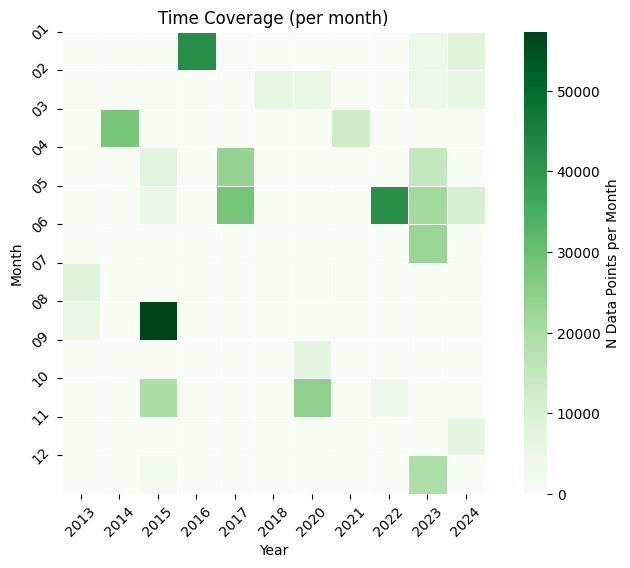

In [7]:
aodn_dataset.plot_time_coverage()

## Read Metadata

In [8]:
meta = aodn_dataset.get_metadata()

2025-05-28 15:31:53,626 - aodn.GetAodn - INFO - Retrieving metadata for s3://aodn-cloud-optimised/vessel_satellite_radiance_derived_product.zarr


In [9]:
meta['global_attributes']['metadata_uuid']

'28f8bfed-ca6a-472a-84e4-42563ce4df3f'

In [10]:
meta

{'global_attributes': {'Conventions': 'CF-1.6,IMOS-1.4',
  'abstract': 'Remote sensing reflectance from DALEC0001 on board AIMS RV Solander. Spectra have been quality controlled based on attitude (pitch, roll, angle relative to bow) and processed to remote sensing reflectance (Rrs). Glint correction has been implemented as described by Brando et al (2016). Data are included as individual spectra, however, it is recommended that users select suitable temporal or spatial sample sets and calculate the mean of the 5-25 percentile range to minimize the effects of surface roughness in the estimation of Rrs (Hooker et al. 2002,  Zibordi et al. 2004).\n Voyage information for the AIMS vessel Solander can be found at https://apps.aims.gov.au/voyage-tracker/vessel/2 Voyage reports and underway data for Marine National Facility (e.g. Southern Surveyor) can be found at https://www.marine.csiro.au/data/trawler/, using the Voyage_number attribute to identify the voyage. Calibration File:DALEC0001_20

## Querying data

In [11]:
import numpy as np
np.unique(ds.platform_code.data)

array(['', 'VMQ9273'], dtype='<U7')

In [12]:
%%time
ds = aodn_dataset.get_data(date_start='2023-01-27', date_end='2023-01-28', scalar_filter = {'platform_code' : 'VMQ9273'})

CPU times: user 277 ms, sys: 114 ms, total: 392 ms
Wall time: 2.9 s


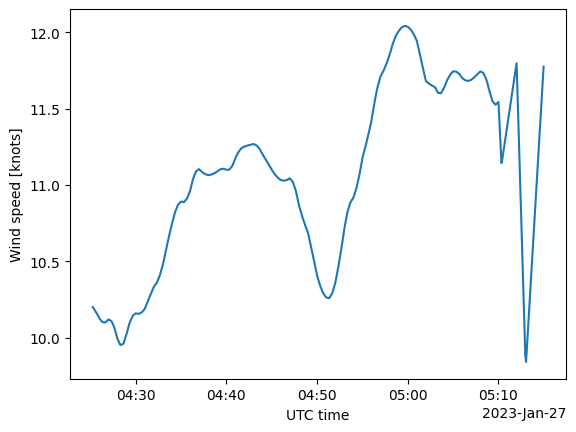

In [13]:
ds.windspeed.plot()

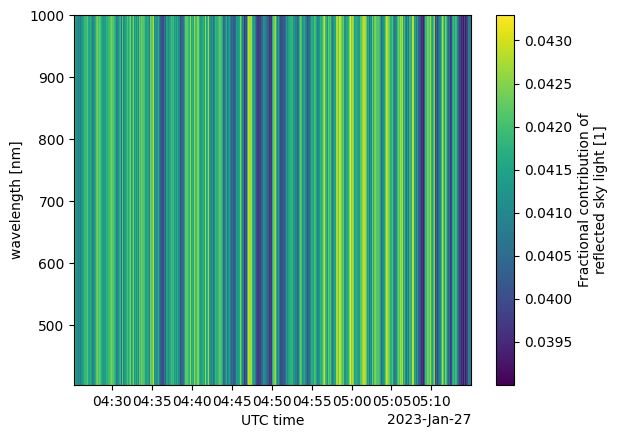

In [14]:
ds.rho.plot()